# Conspiracy Theories: Exploring the Relationship between Sightings and Demographics

### A CMSC320 Project

Sally Zhao

CMSC320

Final Tutorial6/21 Project 

5/16/21

## Introduction:

### Project Purpose

One of the age old American pasttimes is that of the rumination of conspiracy theories: from postulating the existence long lost civilizations such as Atlantis to wondering if that creak at night can be attributed to the haunting by a vengeful spirit. While some may perceive such beliefs to be silly and frivolous, the existence of such things is a topic of great intrigue and carry important societal, cultural, economic importance. The US miltary, for one, has spent and invested much into researching the existence of unidentified flying objects (UFOs) in particular. Indeed, the existence of UFOs would have great military ramifications as we must prepare to deal with potentially hostile entities with technology far beyond our current capabilities. Another interested party would be the FBI - they have been investigating Bigfoot since the 19070s.

As much of our data concerning these phenomenons comes from public reports, it would be in our best interest to be able to determine if demographics plays a role in these reports. If certain human characteristics and attributes could predict reports it would indicate that such sightings may not be completely legitimate. We cannot be certain if the reporter truly believes in the authenticity of their claim and we also cannot determine if said claim is real, but establishing connections between the sightings and our sightee would give us valuable insight.

It's also fun to see which states like to report these things, but I must admit this may just be a personal thing.

In this project, we select two popular conspiracy theories (UFOs and bigfoot) as we cannot look through all conspiracy theories as there seems to be an endless number (bravo to the land of the free and unrestricted internet access). We then try to see if there is a relationship between demographics of those who report these sightings and the sightings themselves. We also try to see if the sightings themselves contain some form of overlap.

### The Data Science Pipeline

Another aim of this project is to illustrate the data science pipeline. We outline five parts:

1. Data collection/curation
2. Data management/representation
3. Exploratory data analysis
4. Hypothesis testing and machine learning
5. Communication of insights attained

We will go into more detail in each respective section. You will find that some of these sections merge into each other as well.

Hopefully, after your perusal of this project, you will gain insight into aliens, bigfoot, demographics and also be able to start your own project.

## 1) Data Collection - Curation and Parsing

No data science project can get started without importing a bunch of libraries. Why do work when your predecessors have tidied things into nice bits of code for you?

Libraries (in no particular order):

1. pandas - essential data analysis library which provides great data structures and manipulation techniques
2. numpy - adds support for mathematical functions especially on arrays
3. matplotlib - plotting library that provides visualization
4. seaborn - another data visualization library (technically you don't need this if you have matplotlib but I find it makes things a lot easier)
5. BeautifulSoup - helps us pull data from html/xml files (web scraping)
6. sklearn - machine learning (e.g. regression, clustering, trees...)
7. folium - great for maps
8. statsmodels - great for statistical analysis of models

In [209]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set(style='ticks')
from bs4 import BeautifulSoup
import requests
import warnings
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import folium
import statsmodels.api as sm
!pip3 install lxml

Here we adjust some display options so graphs/tables are easier to read going forward.

In [136]:
#some display options
pd.options.display.max_rows = 4000
sns.set(rc={'figure.figsize':(11.7,8.27)})

We will now collect relevant data for UFO sightings, Bigfoot sightings, and demographic data (population, political party, religiousness, income, age) by state in that order.

### UFO Sightings

The first order of business is to collect the data we need.

I got my UFO sighting data from: http://www.nuforc.org/webreports.html 

This is the website for the National UFO Reporting center. It is a public domain site where anyone can report UFO sightings. They provide data on each report containing information about the date time of the sighitng, the city and state it was sighted in, shape of UFO, duration seen, and a summary.

The data entries for each state are separate. In order to consolidate information in one big data table for all states, we will need to extract data from each page on a specific state and append it all together.

Here is our starting state (AL). This part of the data is shown to illustrate what kind of data we are scraping.

In [2]:
url = "http://www.nuforc.org/webreports/ndxlAL.html"

# gets page from server
# we locate the data table through HTML tags
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
raw_html = soup.find_all("table")

# converts the tables to a dataframe
ufo_df = pd.read_html(str(raw_html))[0]
   
#illustrate our data
ufo_df.head()

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,4/11/21 20:35,Altoona,AL,Other,3 minutes,Orbital object over N. Alabama that twice came...,4/23/21
1,3/5/21 23:00,Bessemer,AL,Triangle,8 minutes,"DEATH STAR came to mind ,electrical fire color...",3/31/21
2,2/20/21 10:15,Fort Payne,AL,Cylinder,1 minute,Shiny UFO over Fort Payne,3/2/21
3,2/13/21 19:53,Citronelle,AL,Other,7 minutes,"The sky lights up along the horizon,light flas...",3/2/21
4,2/9/21 19:30,Silas,AL,Sphere,15 minutes,Three Orange round Shapes Appear in Silas Alab...,3/2/21


Now we go through state by state, going by abbreviations. By changing the website URL each time, we can extract data on each state and put it all together.

In [3]:
url = "http://www.nuforc.org/webreports/ndxlAK.html"

#list of states we iterate through to make sure we get each one
states = ["AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
          "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
          "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
          "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
          "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

#loop through each state and extract its data
for i in range(len(states)):
    #some pages do not have a table for some reason
    #thus we have a try catch statement to prevent errors
    try:
        # gets page from server
        # stats in it.
        r = requests.get(url)
        soup = BeautifulSoup(r.text, "html.parser")
        raw_html = soup.find_all("table")
    
        # converts the tables to a dataframe
        df = pd.read_html(str(raw_html))[0]
   
    
        # add the current dataframe to the list of dataframes already scraped
        ufo_df = ufo_df.append(df)
    
        # change state abbreviation in URL so we can proceed to extract data from the next state
        url = url.replace(states[i], states[i+1])
    except:
        pass

The website gives us much more information than what we truly need. We really only care about number of sightings and the locations(state) they were seen in. Thus, we can drop the columns that have excess data.

This and some of the following steps can be considered data tidying (which isn't technically part of the data collection process) as we are removing unwanted rows of information. However, it is easier to do this now rather than later for clarity's sake. Also we have a lot of data.

In [4]:
ufo_df.drop(["City", "Duration", "Summary", "Posted"], axis=1, inplace=True)

ufo_df

,Date / Time,State,Shape
0,4/11/21 20:35,AL,Other
1,3/5/21 23:00,AL,Triangle
2,2/20/21 10:15,AL,Cylinder
3,2/13/21 19:53,AL,Other
4,2/9/21 19:30,AL,Sphere
...,...,...,...
259,6/30/52,WY,Disk
260,6/30/49 23:00,WY,Disk
261,6/30/71 14:00,WY,Egg
262,20:04,WY,Changing


The data in this dataframe is quite extensive (it lists out each occurence of a UFO sighting one by one in each state). 

I want to generalize by state to see how many UFO sightings are in each state. Thus, we count the number of times a UFO is sighted in each state to create a much smaller and easier to read dataframe.

state_df tells us how many total ufo sightings are reported in each state. Just by glancing at it, it is much more informative than our previously unrefined data scraped straight from the site.

In [33]:
state_df = pd.DataFrame(states, columns = ["State"])
state_df["Total UFO Sightings"] = state_df["State"].map(ufo_df["State"].value_counts())

state_df

,State,Total UFO Sightings
0,AK,449
1,AZ,3169
2,AR,783
3,CA,10297
4,CO,2176
5,CT,1497
6,DC,86
7,DE,294
8,FL,5816
9,GA,1937


### Bigfoot

The data collection process is repeated for bigfoot sightings.

In this case, the data is obtained from: https://data.world/timothyrenner/bfro-sightings-data

This person was nice enough to provide data tables available for download that show bigfoot sightings and locations. The data itself is retrieved from Bigfoot Field Researchers Organization (BFRO) which is the leading source of information on bigfoot sighting reports. It is public domain and anyone, just like with UFO reporting, can feel free to submit a report of bigfoot if they happen to see one.

Since the data is so nicely given to us in the form of csv documents, we do not need to have to go to the trouble of web scraping. Instead, I downloaded the relevant csv files (bfo_reports_geocoded.csv and bfro_report_locations.csv) and loaded in the dataset as a dataframe. This will allow us to do analysis on it later on.

1) bfro_report_locations.csv: Gives time and location (latitude, longitude) of bigfoot sightings - I use this for mapping and visualization

2) bfo_reports_geocoded.csv: Gives a plethora of data about bigfoot sightings (time, state, location, weather, summary, description, etc...) - I use this for finding how many bigfoots are sighted in each state

In [34]:
bigfoot_df = pd.read_csv("bfro_report_locations.csv")
bigfoot_df.drop(["number", "title", "classification"], axis=1, inplace=True)

Aggregating bigfoot sightings by state can be done with the previous dataframe (bigfoot_df) through something called reverse geocoding - turning a location described by coordinated into something human-readable (in this case, state name). However, after some research I found that the best way to do this is by using a Google API. This process takes quite a bit of time and we have a not insignificant number of bigoot sightings.

My computer may be a machine, but my patience is only human.

Since the data is available to us already (just in a different csv), I elected to use that instead. Rest assured, we still will use bigfoot_df location coordinates for mapping purposes in later sections (visualization). We use the same technique as we did in for finding number of UFO sightings by state (counting how many bigfoot sightings are reported in the state and consolidating it)

This file (bfo_reports_geocoded.csv) also has a lot of excess information so we cut that out as well.

In [138]:
bigfoot_state_df = pd.read_csv("bfro_reports_geocoded.csv")

#unnecessary data we can drop
to_drop = ["observed", "location_details", "county", "season", "title", "latitude", "longitude", "date", "number", "date", "number", "classification", "geohash", "temperature_high",
          "temperature_mid", "temperature_low", "dew_point", "humidity", "cloud_cover", "moon_phase", "precip_intensity", "precip_probability", "precip_type", "pressure", "summary", "uv_index",
          "visibility", "wind_bearing", "wind_speed"]

bigfoot_state_df.drop(to_drop, axis=1, inplace=True) #drop it

bigfoot_state_df.columns = ["State"]

In [139]:
# The data we imported gives states to us as full names
# In order to stay consistent between dataframes, I convert these all to the state abbreviations
us_state_abbrev = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO',
'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD',
'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'}

#replace full state names with their abbreviations
bigfoot_state_df['State'] = bigfoot_state_df['State'].map(us_state_abbrev).fillna(bigfoot_state_df['State'])

#count instances by state and place in general state dataframe
state_df["Total Bigfoot Sightings"] = bigfoot_state_df["State"].map(bigfoot_state_df["State"].value_counts())
state_df.head()

,State,Total UFO Sightings,Total Bigfoot Sightings
0,AK,449,20
1,AZ,3169,63
2,AR,783,13
3,CA,10297,15
4,CO,2176,4


We now have a dataframe (state_df) that shows total recorded UFO sightings and total Bigfoot sightings by state. We did lose a lot of excess data in making this table, but it is now much more human-readable and informative with a quick look.

It is also relevant to how we are going to be analyzing state demographics with prevalence of these sightings.

### Demographics

We now have our UFO and bigfoot sighting data on hand. Since we want to see if human factors can predict sighting prevalence, we need to obtain data on these human factors - that is, demographics.

There are a lot of demographic characteristics we could choose to analyze. For the sake of convenience, I chose five that I believed to be most interesting: 

1. Population
2. Political Party
3. Belief in God / Religiousness
4. Income
5. Age

These demographics are by state. Since we do not have the exact details on every person who report UFOs/Bigfoot (most are anonymous and such detail is not collected in detail anyway), we settle on the next best thing - general demographics from the location these reports come from. This is not a perfect solution, but it will help us see if there is a connection between sightings and state demographics and through this, perhaps sightings and reporter characteristics.

The site / resource where each particular piece of data is obtained from is listed below by section. We go through and webscrape various websites to obtain this data.

### Population

Data obtained from: https://www.infoplease.com/us/states/state-population-by-rank

In [108]:
url = "https://www.infoplease.com/us/states/state-population-by-rank"

# gets page from server
# stats in it.
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
raw_html = soup.find_all("table")
# converts the tables to a dataframe
pop_df = pd.read_html(str(raw_html))[0]
   
pop_df.head()

,Rank,State,July 2019 Estimate,Percent of Total
0,1.0,California,39512223,11.91%
1,2.0,Texas,28995881,8.74%
2,3.0,Florida,21477737,6.47%
3,4.0,New York,19453561,5.86%
4,5.0,Illinois,12671821,3.86%


### Political party

Data obtained from: https://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/

In [109]:
url = "https://www.pewforum.org/religious-landscape-study/compare/party-affiliation/by/state/"

# gets page from server
# stats in it.
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
raw_html = soup.find_all("table")
# converts the tables to a dataframe
party_df = pd.read_html(str(raw_html))[0]

party_df = party_df.drop(51) #unnecessary summarization at end
   
party_df.head()

,State,Republican/lean Rep.,No lean,Democrat/lean Dem.,Sample Size
0,Alabama,52%,13%,35%,511
1,Alaska,39%,29%,32%,310
2,Arizona,40%,21%,39%,653
3,Arkansas,46%,16%,38%,311
4,California,30%,21%,49%,3697


### Belief in God

Data obtained from: https://www.pewforum.org/religious-landscape-study/compare/belief-in-god/by/state/

In [110]:
url = "https://www.pewforum.org/religious-landscape-study/compare/belief-in-god/by/state/"

# gets page from server
# stats in it.
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
raw_html = soup.find_all("table")
# converts the tables to a dataframe
rel_df = pd.read_html(str(raw_html))[0]

rel_df = rel_df.drop(51) #unnecessary summarization at end
rel_df.head()

,State,Believe in God; absolutely certain,Believe in God; fairly certain,Believe in God; not too/not at all certain,Believe in God; don't know,Do not believe in God,Other/don't know if they believe in God,Sample Size
0,Alabama,82%,12%,2%,1%,2%,2%,511
1,Alaska,55%,24%,5%,1%,12%,3%,310
2,Arizona,62%,20%,6%,< 1%,10%,2%,653
3,Arkansas,77%,15%,2%,< 1%,4%,1%,311
4,California,54%,22%,8%,1%,12%,2%,3697


### Income

Data obtained from: https://fred.stlouisfed.org/release/tables?eid=259515&rid=249

In [111]:
url = "https://fred.stlouisfed.org/release/tables?eid=259515&rid=249"

# gets page from server
# stats in it.
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
raw_html = soup.find_all("table")
# converts the tables to a dataframe
income_df = pd.read_html(str(raw_html))[0]

#current column labels are tuples, we merge them together to become strings
income_df.columns = income_df.columns.map('_'.join)
   
income_df.head()

,Unnamed: 0_level_0_Unnamed: 0_level_1,Unnamed: 1_level_0_Name,2019 CPI-U-RS Adjusted Dollars_2019,2019 CPI-U-RS Adjusted Dollars_Preceding Period,2019 CPI-U-RS Adjusted Dollars_Year Ago from Period
0,NaN,The United States,68703,64324,64324
1,NaN,Alabama,56200,50841,50841
2,NaN,Alaska,78394,69979,69979
3,NaN,Arizona,70674,63411,63411
4,NaN,Arkansas,54539,50683,50683


### Age

Data obtained from: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_median_age

In [112]:
url = "https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_median_age"

# gets page from server
# stats in it.
r = requests.get(url)
soup = BeautifulSoup(r.text, "html.parser")
raw_html = soup.find_all("table")
# converts the tables to a dataframe
age_df = pd.read_html(str(raw_html))[0]
   
age_df.head()

,Rank,"State,federal district,or territory",Median age in years (Total Population)[1][2][note 2]
0,1,Maine,45.0
1,2,Puerto Rico[2],43.6
2,3,New Hampshire,43.1
3,4,Vermont,43.0
4,5,West Virginia,42.9


## 1.5) Data Tidying - It's all coming together

Technically, we've already done some data tidying (cutting out extra fluff and consolidating state data for example), but in this case we want to put all of our state data (UFO sightings, Bigfoot sightings, population, political orientation, belief in god, income, and age) into one dataframe for ease of analysis. 

This final dataframe will be used for analysis going forward. Having all our relevant data in one place makes everything both easier to read and use.

Again, why do we care about state data? A lot of reports come from anonymous sources so the characteristics of each exact witness is not actually given. So we do the next best thing and analyze the demographics of the locations where these reports are coming from - that is, state data.

In [113]:
#Drop unnecessary columns and do renaming
pop_df.drop(["Rank", "Percent of Total"], axis=1, inplace=True)
party_df.drop(["No lean", "Sample Size"], axis=1, inplace=True)
rel_df.drop(["Believe in God; don't know", "Believe in God; not too/not at all certain", "Do not believe in God", "Other/don't know if they believe in God", "Sample Size"], axis=1, inplace=True)
income_df.drop(["Unnamed: 0_level_0_Unnamed: 0_level_1", "2019 CPI-U-RS Adjusted Dollars_Preceding  Period", "2019 CPI-U-RS Adjusted Dollars_Year Ago  from Period"], axis=1, inplace=True)
age_df.drop(["Rank"], axis=1, inplace=True)

In [114]:
#Merge relevant columns in party_df and rel_df
rel_df["God"] = [(float(str(row.loc["Believe in God; absolutely certain"])[:-1]) + float(str(row.loc["Believe in God; fairly certain"])[:-1])) for (index, row) in rel_df.iterrows()]
rel_df.drop(["Believe in God; absolutely certain", "Believe in God; fairly certain"], axis=1, inplace=True)

In [115]:
#Convert political party to number values (so we can chart it)
party_df["Republican/lean Rep."] = [float(str(row.loc["Republican/lean Rep."])[:-1]) for (index, row) in party_df.iterrows()]
party_df["Democrat/lean Dem."] = [float(str(row.loc["Democrat/lean Dem."])[:-1]) for (index, row) in party_df.iterrows()]

In [117]:
#rename columns to appropriate standardized names for ease of use / meaning
pop_df.columns = ['State', 'Population']
party_df.columns = ['State', 'Republican (%)', 'Democrat (%)']
rel_df.columns = ['State', 'Believe in God (%)']
income_df.columns = ['State', 'Median Income']
age_df.columns = ['State', 'Median Age']

In [140]:
state_df.head()

,State,Total UFO Sightings,Total Bigfoot Sightings
0,AK,449,20
1,AZ,3169,63
2,AR,783,13
3,CA,10297,15
4,CO,2176,4


In [119]:
#convert full state names from each dataframe to their abbreviations - this allows us to match strings going forward
pop_df['State'] = pop_df['State'].map(us_state_abbrev).fillna(pop_df['State'])
party_df['State'] = party_df['State'].map(us_state_abbrev).fillna(party_df['State'])
rel_df['State'] = rel_df['State'].map(us_state_abbrev).fillna(rel_df['State'])
income_df['State'] = income_df['State'].map(us_state_abbrev).fillna(income_df['State'])
age_df['State'] = age_df['State'].map(us_state_abbrev).fillna(age_df['State'])

In [141]:
#merging all together to get final dataframe with all information
df = pd.merge(state_df, pop_df, on="State")
df = pd.merge(df, party_df, on="State")
df = pd.merge(df, rel_df, on="State")
df = pd.merge(df, income_df, on="State")
df = pd.merge(df, age_df, on="State")

We want to represent our UFO and Bigfoot sightings by state in a meaningful way. 

States with higher populations will naturally report more UFO and bigfoot sightings - there are simply more people to do the reporting. Thus we are going to represent sightings per ten thousand capita (total / population)*10000

This makes it so that states with unequal populations are all on an even playing field (when we look at sightings per capita rather than total sightings overall)

In [142]:
df["UFO per capita"] = [(float(row.loc["Total UFO Sightings"])/float(row.loc["Population"]))*10000 for (index, row) in df.iterrows()]
df["Bigfoot per capita"] = [(float(row.loc["Total Bigfoot Sightings"])/float(row.loc["Population"]))*10000 for (index, row) in df.iterrows()]

#A sample of our data
df.head()

,State,Total UFO Sightings,Total Bigfoot Sightings,Population,Republican (%),Democrat (%),Believe in God (%),Median Income,Median Age,UFO per capita,Bigfoot per capita
0,AK,449,20,731545,39.0,32.0,79.0,78394,35.0,6.137695,0.273394
1,AZ,3169,63,7278717,40.0,39.0,82.0,70674,38.2,4.353789,0.086554
2,AR,783,13,3017825,46.0,38.0,92.0,54539,38.5,2.594584,0.043077
3,CA,10297,15,39512223,30.0,49.0,76.0,78105,37.0,2.606029,0.003796
4,CO,2176,4,5758736,41.0,42.0,78.0,72499,37.1,3.778607,0.006946


Now our data is in a digestable and organized form. Here are our columns and their representations:

1. State - one of the 50 states of America
2. Total UFO sightings - all recorded sightings of UFOs for the state
3. Total Bigfoot sightings  - all recorded sightings of Bigfoot for the state
4. Population - state population as of 2019
5. Republican (%) - Percentage of state that is republican as of 2019
6. Democrat (%) - Percentage of state that is democrat as of 2019
7. Believe in God (%) - Percentage of state that believes in God as of 2019
8. Median Income - medican income for adult in state
9. Median Age - median age of the state
10. UFO per capita - amount of UFO sightings per 10000 people
11. Bigfoot per capita - amount of Bigfoot sightings per 10000 people

## 2) Visualization - Representing our data (and some exploratory analysis)

Now that we have all our data and cleaned it up, we want to present it in a way that tells us information about the data we are analyzing. Making different charts will allow us to spot trends that show correlation between certain variables. 

### UFO and Bigfoot Reports by State

We want to see which UFO per capita and Bigfoot per capita by state. This will allow us to see which states have the greatest number of sightings per person. 

In [145]:
#reshape dataframe so we can see ufo and bigfoot per capita compared side to side
df_bar = df[["State", "UFO per capita", "Bigfoot per capita"]]
df_bar = pd.melt(df_bar, id_vars="State", var_name="Sighting", value_name="Frequency")

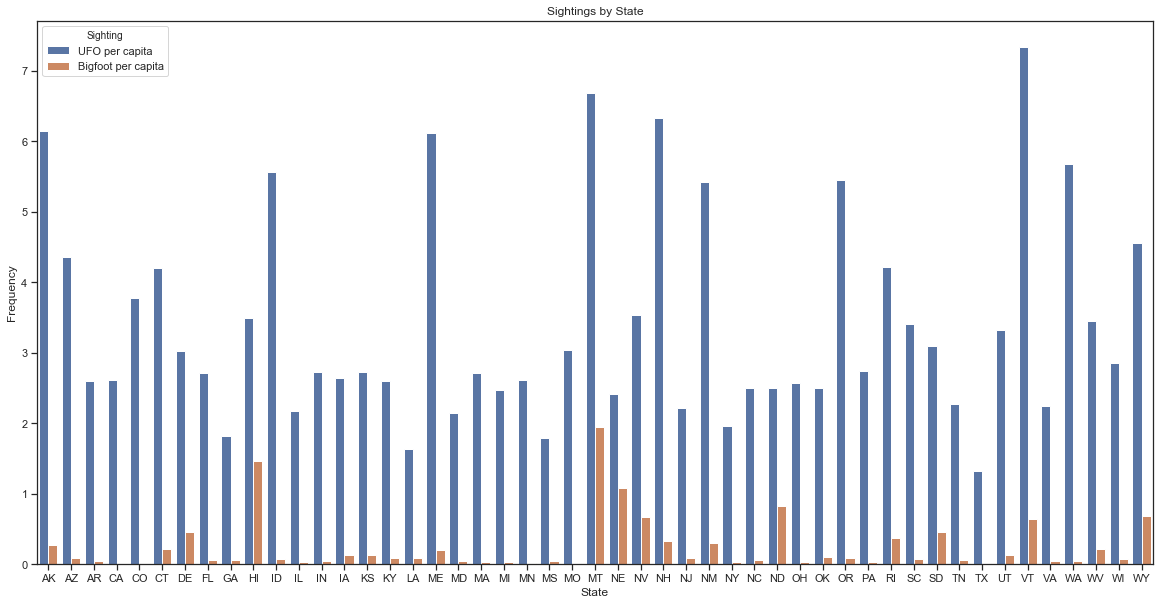

In [238]:
#nested bar plot
plt.figure(figsize=(20, 10))
sns.barplot(x="State", hue="Sighting", y="Frequency", data=df_bar)

plt.title("Sightings by State")
plt.xlabel("State")
plt.ylabel("Frequency")
plt.show() 

This is a barplot showing UFO per capita and Bigfoot per capita (frequency of reports per 10000 people) by state.

From the barplot above, we can see that there VT has the highest number of UFO sightings per person.

Meanwhile, it appears MT has the highest number of Bigfoot sightings per person.

### Mapping UFOs and Bigfoot Together

It would be good to visually see the locations of the sightings for UFOs and bigfoot. 

Now, there are some discrepancies in the data that makes this a little difficult. Our UFO sighting data is grouped by state - we don't have any more specific descriptors such as latitude or longitude. On the other hand, we do have latitude and longitude data for our bigfoot sightings. 

Thus, the map we are going to create is going to represent UFO sightings by shade of state (since we only have the state totals). Bigfoot sightings will be represented with pins (since we have more specific latitude and longitude variables). 

In [122]:
#Import state geography data
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/us-states.json"

#create our map with starting location centered around the USA and zoom at a decent spot
m = folium.Map(location=[48, -102], zoom_start=5)

In [123]:
#Color in states based on their UFO per capita data
folium.Choropleth(
    geo_data=state_geo,
    name="choropleth",
    data=df,
    columns=["State", "UFO per capita"],
    key_on="feature.id",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="UFO Sightings per 10000",
).add_to(m)

folium.LayerControl().add_to(m)

There are a lot of bigfoot sightings and, subsequently, a lot of latitude and longitudinal data for these sightings. Plotting every single point of data (every single sighting) would take too much time for my poor computer to handle. 

Thus, we take a random sample of 300 data points to plot on our map. It does take away a bit of information, but it still conveys the message at minimal cost.

In [124]:
#cannot plot every single bigfoot sighting so we take a random sample to plot
bigfoot_df.sample(n=300).apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], 
                                              radius=1, color="red")
                                             .add_to(m), axis=1)

2126    <folium.vector_layers.CircleMarker object at 0...
801     <folium.vector_layers.CircleMarker object at 0...
721     <folium.vector_layers.CircleMarker object at 0...
590     <folium.vector_layers.CircleMarker object at 0...
3846    <folium.vector_layers.CircleMarker object at 0...
3697    <folium.vector_layers.CircleMarker object at 0...
403     <folium.vector_layers.CircleMarker object at 0...
2380    <folium.vector_layers.CircleMarker object at 0...
2047    <folium.vector_layers.CircleMarker object at 0...
1913    <folium.vector_layers.CircleMarker object at 0...
3054    <folium.vector_layers.CircleMarker object at 0...
3820    <folium.vector_layers.CircleMarker object at 0...
957     <folium.vector_layers.CircleMarker object at 0...
2420    <folium.vector_layers.CircleMarker object at 0...
660     <folium.vector_layers.CircleMarker object at 0...
3971    <folium.vector_layers.CircleMarker object at 0...
727     <folium.vector_layers.CircleMarker object at 0...
3920    <foliu

Below we can now see the UFO per capita and Bigfoot per capita data represented on a map of the USA.

UFO per capita data is represented by the shade of green - the darker the shade, the higher the frequency of sighting per 10000 people.

Bigfoot sightings are individually represented by the red pins.

In [195]:
m

## 3) Exploratory Data Analysis (and visualizations) - Following our gut, finding trends to explore

We have a lot of data and with a lot of data comes a lot of possible visualizations. I can plot bar graphs and scatter plots comparing every single demographic variable against UFO and Bigfoot sightings respectively, but that would be excessive.

The purpose of a visual is to convey some sort of relationship between the data variables we are representing. In our previous barplot, we showed sightings per capita by state which allowed us to directly compare states to one another. In our map, we showed geographical locations and density of the sightings, allowing us to compare the geographical appearance of UFO and bigfoot sightings.

Going forward, I wish to examine several relationships and trends to answer the question:

1. Is there a relationship beteen UFO and bigfoot sightings? That is, are states that report more of one more likely to report more of the other?
2. Can we predict UFO and Bigfoot sighting frequency based on demographics (political, religion, income, age)?

Answering the first question would tell us that there if there is a relationship between these two things. Bigfoot is a terrestially bound creature while UFOs fly in the sky. Intuitively, there should be no geographical relationship between their sightings. The existence of a relationship between these may indicate other variables are at play - perhaps human factors.

Answering the second question would tell us whether the prevalence of sightings are dependent on human factors or not. If sightings and human demographics can be correlated, this may indicate that there are external factors influencing these reports of UFOs and bigfoot and that perhaps these reports are not objective.

### Is there a relationship between UFO and Bigfoot Sightings?

I create a scatterplot comparing UFO and Bigfoot sightings shown in the graph below. Each data point represents a state and they are color coded and labeled by state as well.

I have also plotted a regression line against it to see if there is any positive or negative correlation between the two types of sightings.

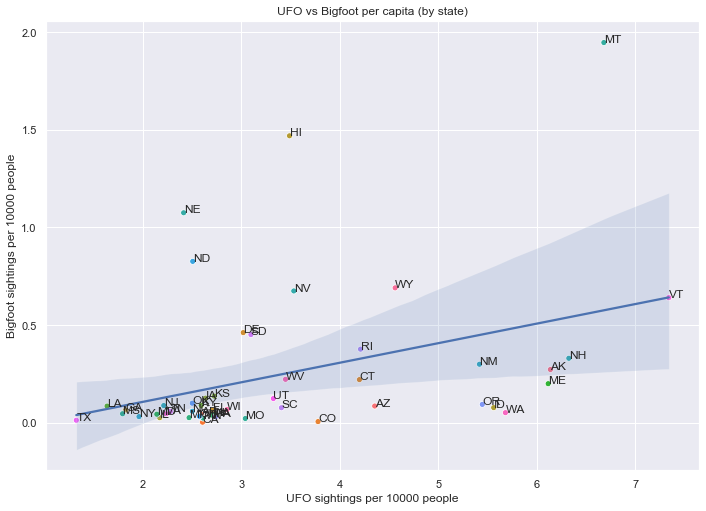

In [132]:
#plotting
g1 = sns.scatterplot(data=df, x="UFO per capita", y="Bigfoot per capita", hue="State") #create scatter
for x,y,z in zip(df["UFO per capita"], df["Bigfoot per capita"], df["State"]):         #label points
    plt.text(x=x, y=y, s = z)
sns.regplot(data=df, x="UFO per capita", y="Bigfoot per capita", scatter=False, ax=g1)  #add regression line
g1.get_legend().remove()                                                  #remove legend
plt.title('UFO vs Bigfoot per capita (by state)')                #add title
                                                                          #axes labels
plt.xlabel("UFO sightings per 10000 people")
plt.ylabel("Bigfoot sightings per 10000 people")
plt.ticklabel_format(style='plain', axis='x')
plt.show() 

The graph "UFO vs Bigfoot per capita (by state)" shows us each state's UFO per capita and Bigfoot per capita plotted against each other. Points are colored and labeled by state as well.

This is done to try to see if there is a relationship between the two variable. Indeed, there does appear to be a positive correlation between the two as illustrated by the regression line.

An interesting trend to note is that most states appear to be clustered in a similar region. These are mostly the more populated states which makes sense - not many bigfoots live in cities and it may be difficult to see UFOs due to light pollution (these are just two possible explanations). The more rural states are more spread out.

There are a couple of outlier variable points I want to point out as well. MT (Montana) has an extremely high number of bigfoot sightings compared to any other state. It also has a high UFO sighting rate (but not as dramatic). This could be explained by local culture and geography - bigfoot is typically considered a woodland creature and much of MT is forest. 

###  Correlation by column - Are there any particular variables that correlate with each other?

Instead of just looking at UFOs and Bigfoot, I also want to explore if other variables can play into their prediction.

Thus, we create a heatmap comparing column variables against each other.

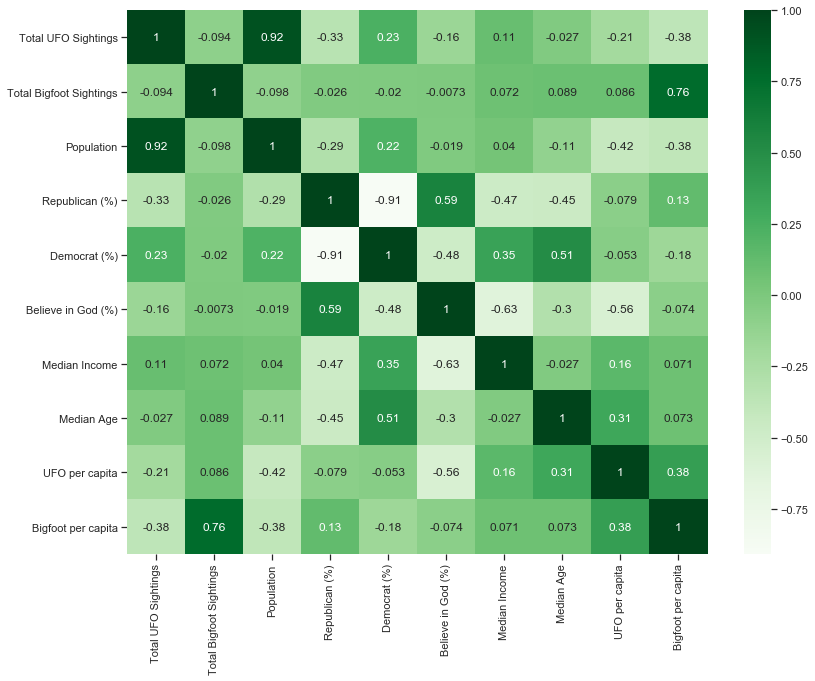

In [197]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True, cmap='Greens')
plt.show()

The chart above is a correlation map that shows correlation (or lack thereof) between pairs of variables. The absolute value of the number range from 0 to 1. The closer to 1 the higher the correlation and the closer to 0 the less of a relationship between the two variables. The values are also either positive or negative. Positive indicates a positive correlation (the greater one variable the greater the other) while negative correlation shows a negative relationship (the greater one variable the smaller the other and vice versa).

We can see that there are a lot of not very closely correlated elements in the table above. Quite a bit have values close to 0. However, there are some I want to point out:

UFO per capita
1. Negatively correlated with population
2. Negatively correlated with belief in God
3. Weakly positively correlated with income.
4. Weakly-medium positively correlatedwith age
5. Correlated with bigfoot per capita

Bigfoot per capita
1. Negatively correlated with population
2. Very weakly positively correlated with Republicans and negatively correlated with Democrats
3. Correlated with bigfoot per capita

It's interesting as it seems there are different types of characteristics associated with those who report UFOs and Bigfoot.

There are also a lot of interesting relationships between demographics (such as belief in God and being Republican), but that is outside the scope of this project.

## 4) Hypothesis Testing and Machine Learning

Having done our exploratory data analysis and visualized them, we now wish to see if such relationships between variables are significant.

Also, we want to answer the question: can we predict sighiting prevalence based on state demographics?

### Multiple Regression - Predicting UFO Sightings Per Capita through Demographics

We want to try predicting per capita sightings and seeing how accurate they are.

First we establish our xs and ys (the variables we predict based off of (independent variables) and the one we predict (dependent variable))
We will do this for both UFO per capita and bigfoot per capita

In [244]:
#establish xs and ys
y_ufo = df["UFO per capita"]
y_bigfoot = df["Bigfoot per capita"]
x = df[[
 'Republican (%)',
 'Believe in God (%)',
 'Median Income',
 'Median Age']]

Multivariate linear regression or OLS is a simple and popular regression model. It finds parameters that minimize error (specifically mean squared error) between predictions and the the prediction target with the provided data.

Through its coefficients, we can see how much our target regression value increases/decreases based upon increases/decreases in the independent variables (politics, religion, income, and age in this case)

In [245]:
#we fit a linear model
ufo_regr1 = linear_model.LinearRegression()
ufo_regr1.fit(x, y_ufo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Here I output the regression results from OLS for UFO predictions. 

We can see that the R^2 value is decently high at 0.495. Since reports are a form of human behavior, we cannot expect to perfectly predict everything. So the R square being less than 50% is acceptable. 

Our p values are also acceptable low which show that the variables we use are significant.

Thus, we can accept that UFO report frequency can be dependent on the inputted variables. 

In [201]:
#Here I redid the model real quick using the statsmodel library so we can get a better view of the regression results summary
#it is identical to the above model that used scikitlearn instead
#It's also easier to get the coefficient t and p values this way
x = sm.add_constant(x)
ufo_regr2 = sm.OLS(y_ufo, x) #ordinary least squares

reg_ufo = ufo_regr2.fit()
print(reg_ufo.summary())

                            OLS Regression Results                            
Dep. Variable:         UFO per capita   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.449
Method:                 Least Squares   F-statistic:                     10.76
Date:                Sun, 16 May 2021   Prob (F-statistic):           3.60e-06
Time:                        14:29:23   Log-Likelihood:                -71.316
No. Observations:                  49   AIC:                             152.6
Df Residuals:                      44   BIC:                             162.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 11.3850      6

We repeat this process now for bigfoot.

We see that bigfoot's R square value is much lower than that for UFOs at only 0.091. This is very close to 0. 

This tells us there is very little relationship between bigfoot sightings and our inputted variables (or perhaps we cannot model it using linear regression). Either way, it seems that politics, religion, income, and age are not very good predictors for bigfoot sightings.

In [202]:
x = sm.add_constant(x)
bigfoot_regr = sm.OLS(y_bigfoot, x) #ordinary least squares

reg_bigfoot = bigfoot_regr.fit()
print(reg_bigfoot.summary())

                            OLS Regression Results                            
Dep. Variable:     Bigfoot per capita   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.098
Date:                Sun, 16 May 2021   Prob (F-statistic):              0.369
Time:                        14:29:32   Log-Likelihood:                -20.424
No. Observations:                  49   AIC:                             50.85
Df Residuals:                      44   BIC:                             60.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.7928      2

### Decision Tree Regression

In [222]:
#take subset of data to fit
X_train_ufo, X_test_ufo, y_train_ufo, y_test_ufo = train_test_split(x, y_ufo, test_size = 0.2, random_state = 12)

In [239]:
# instantiate the model 
tree = DecisionTreeRegressor()
# fit the model 
tree.fit(X_train_ufo, y_train_ufo)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test_ufo)
y_train_tree = tree.predict(X_train_ufo)

#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train_ufo, y_train_ufo)
acc_test_tree = tree.score(X_test_ufo, y_test_ufo)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train_ufo, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test_ufo, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: -2.751

Decision Tree: The RMSE of the training set is: 0.0
Decision Tree: The RMSE of the testing set is: 2.4617915381602105


In [241]:
#take subset of data to fit
X_train_bigfoot, X_test_bigfoot, y_train_bigfoot, y_test_bigfoot = train_test_split(x, y_bigfoot, test_size = 0.2, random_state = 12)

In [243]:
# instantiate the model 
tree = DecisionTreeRegressor()
# fit the model 
tree.fit(X_train_bigfoot, y_train_bigfoot)

#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test_bigfoot)
y_train_tree = tree.predict(X_train_bigfoot)

#computing the accuracy of the model performance
acc_train_tree = tree.score(X_train_bigfoot, y_train_bigfoot)
acc_test_tree = tree.score(X_test_bigfoot, y_test_bigfoot)

#computing root mean squared error (RMSE)
rmse_train_tree = np.sqrt(mean_squared_error(y_train_bigfoot, y_train_tree))
rmse_test_tree = np.sqrt(mean_squared_error(y_test_bigfoot, y_test_tree))

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))
print('\nDecision Tree: The RMSE of the training set is:', rmse_train_tree)
print('Decision Tree: The RMSE of the testing set is:', rmse_test_tree)

Decision Tree: Accuracy on training Data: 1.000
Decision Tree: Accuracy on test Data: -6.896

Decision Tree: The RMSE of the training set is: 0.0
Decision Tree: The RMSE of the testing set is: 0.5196432433219667


### Conclusion

## Recap

With this tutorial we illustrated the data pipeline. We webscraped and collected data and tidied it. With visualizations we could see emergent patterns and trends between our data.

With our testing, we do see that UFOs can be predicted based on state demographics but bigfoot is more illusive.